<a href="https://colab.research.google.com/github/thiagosdfc/Saude/blob/main/Tarefa02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# URLs das tabelas
url_demo = 'https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.XPT'
url_bmi = 'https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.XPT'
url_bp = 'https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.XPT'

In [3]:
Demo = pd.read_sas(url_demo)
Bmi = pd.read_sas(url_bmi)
Bp = pd.read_sas(url_bp)

In [4]:
 print(Demo)

         SEQN  SDDSRVYR  RIDSTATR  RIAGENDR  RIDAGEYR  RIDAGEMN  RIDRETH1  \
0     83732.0       9.0       2.0       1.0      62.0       NaN       3.0   
1     83733.0       9.0       2.0       1.0      53.0       NaN       3.0   
2     83734.0       9.0       2.0       1.0      78.0       NaN       3.0   
3     83735.0       9.0       2.0       2.0      56.0       NaN       3.0   
4     83736.0       9.0       2.0       2.0      42.0       NaN       4.0   
...       ...       ...       ...       ...       ...       ...       ...   
9966  93698.0       9.0       2.0       1.0       2.0       NaN       1.0   
9967  93699.0       9.0       2.0       2.0       6.0       NaN       4.0   
9968  93700.0       9.0       2.0       1.0      35.0       NaN       3.0   
9969  93701.0       9.0       2.0       1.0       8.0       NaN       3.0   
9970  93702.0       9.0       2.0       2.0      24.0       NaN       3.0   

      RIDRETH3  RIDEXMON  RIDEXAGM  ...  DMDHREDU  DMDHRMAR  DMDHSEDU  \
0 

In [5]:
unifica1 = pd.merge(Demo, Bmi, on='SEQN', how='inner')
Dataset = pd.merge(unifica1, Bp, on='SEQN', how='inner')
print(Dataset)

         SEQN  SDDSRVYR  RIDSTATR  RIAGENDR  RIDAGEYR  RIDAGEMN  RIDRETH1  \
0     83732.0       9.0       2.0       1.0      62.0       NaN       3.0   
1     83733.0       9.0       2.0       1.0      53.0       NaN       3.0   
2     83734.0       9.0       2.0       1.0      78.0       NaN       3.0   
3     83735.0       9.0       2.0       2.0      56.0       NaN       3.0   
4     83736.0       9.0       2.0       2.0      42.0       NaN       4.0   
...       ...       ...       ...       ...       ...       ...       ...   
9539  93698.0       9.0       2.0       1.0       2.0       NaN       1.0   
9540  93699.0       9.0       2.0       2.0       6.0       NaN       4.0   
9541  93700.0       9.0       2.0       1.0      35.0       NaN       3.0   
9542  93701.0       9.0       2.0       1.0       8.0       NaN       3.0   
9543  93702.0       9.0       2.0       2.0      24.0       NaN       3.0   

      RIDRETH3  RIDEXMON  RIDEXAGM  ...  BPAEN1  BPXSY2  BPXDI2  BPAEN2  \


In [6]:
ds_maiores_que_20 = Dataset.loc[Dataset['RIDAGEYR'] > 19]
Dataset2 = ds_maiores_que_20.loc[ds_maiores_que_20['RIDAGEYR'] < 61]
Dataset2.shape

(3784, 92)

In [7]:
Dataset3 = Dataset2[['RIDAGEYR', 'BMXBMI', 'BPXSY1']]
DatasetRename = Dataset3.rename(columns={
    'RIDAGEYR': 'Idade',
    'BMXBMI': 'IMC',
    'BPXSY1': 'PAS'})
print(DatasetRename)

      Idade   IMC    PAS
1      53.0  30.8  146.0
3      56.0  42.4  132.0
4      42.0  20.3  100.0
9      22.0  28.0  110.0
10     32.0  28.2  120.0
...     ...   ...    ...
9531   32.0  32.9  112.0
9532   25.0  21.0  112.0
9537   26.0  33.8  118.0
9541   35.0  26.0  104.0
9543   24.0  21.4  118.0

[3784 rows x 3 columns]


In [8]:
linha_especifica = DatasetRename.iloc[173]  # Imprime a terceira linha (índice 2)

print(linha_especifica)

Idade     33.0
IMC       34.1
PAS      104.0
Name: 426, dtype: float64


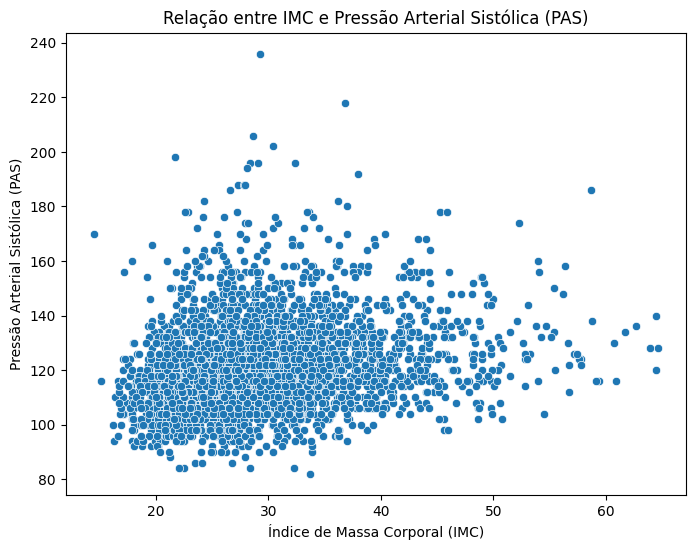

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='IMC', y='PAS', data=DatasetRename)
plt.title('Relação entre IMC e Pressão Arterial Sistólica (PAS)')
plt.xlabel('Índice de Massa Corporal (IMC)')
plt.ylabel('Pressão Arterial Sistólica (PAS)')
plt.show()

In [10]:

# Definir as variáveis dependente (X) e independente (y)
X = DatasetRename[['IMC']]
y = DatasetRename['PAS']
print(X)
print(y)


       IMC
1     30.8
3     42.4
4     20.3
9     28.0
10    28.2
...    ...
9531  32.9
9532  21.0
9537  33.8
9541  26.0
9543  21.4

[3784 rows x 1 columns]
1       146.0
3       132.0
4       100.0
9       110.0
10      120.0
        ...  
9531    112.0
9532    112.0
9537    118.0
9541    104.0
9543    118.0
Name: PAS, Length: 3784, dtype: float64


In [15]:
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(DatasetRename[['IMC']])
y = imputer.fit_transform(DatasetRename[['PAS']])

Esse ajuste foi feito porque, no meu modelo eu encontrei "Missing Values", mas acho que foi pontual pois não ocorreu o mesmo com os demais colegas de classe.

In [17]:
# Criar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [18]:
# Fazer predições
y_pred = model.predict(X)

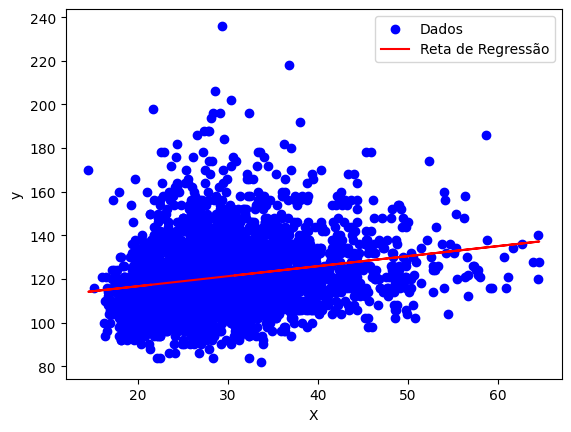

In [21]:
# Plotando os dados e a linha de regressão
plt.scatter(X, y, color='blue', label='Dados')
plt.plot(X, y_pred, color='red', label='Reta de Regressão')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [20]:
# Avaliar o modelo
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
coef = model.coef_[0]

print(f'Erro quadrático médio (MSE): {mse:.2f}')
print(f'Coeficiente da regressão: {coef[0]:.2f}')
print(f'Coeficiente de determinação (R²): {r2:.2f}')

Erro quadrático médio (MSE): 226.49
Coeficiente da regressão: 0.46
Coeficiente de determinação (R²): 0.05


O valor de
 (coeficiente de determinação) indica a proporção da variação na PAS explicada pelo IMC.

Se o valor de R² for próximo de 1, significa que uma grande parte da variação da PAS é explicada pelo IMC, sugerindo uma forte dependência. Nesse caso, não existe dependência.

Se o valor de R² for próximo de 0, significa que o IMC explica muito pouco da variação da PAS, sugerindo independência ou uma relação fraca. É o que acontece nesse caso, não existe relação entre pressão sanguínea e IMC.